In [1]:
# import numpy as np
# import pandas as pd
# from scipy import stats
# import statsmodels.api as sm
# import statsmodels
# import matplotlib.pyplot as plt
# from UE_04_LinearRegDiagnostic import LinearRegDiagnostic
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import MNLogit
import os as os

In [29]:
current = os.getcwd()
path = os.path.dirname(current)

In [30]:
print(path)

c:\Users\david\E-15\Programmieren\MotorcycleClassification


In [10]:
df_train = pd.read_csv(path+"/data/train/training_data.csv")
df_test = pd.read_csv(path+"/data/validation/test_data.csv")

In [11]:
# # Import data
# y_cols = [
#     "Category_ATV",
#     "Category_Allround",
#     "Category_Classic",
#     "Category_Cross / motocross",
#     "Category_Custom / cruiser",
#     "Category_Enduro / offroad",
#     "Category_Naked bike",
#     "Category_Scooter",
#     "Category_Sport",
#     "Category_Sport touring",
#     "Category_Super motard",
#     "Category_Touring",
#     "Category_Unspecified category"
# ]

# # y: Labels
# y_train_raw = df_train[y_cols]
# y_test_raw = df_test[y_cols]
# # X: Features (alles außer Kategorien)
# X_train = df_train.drop(columns=y_cols)
# X_test = df_test.drop(columns=y_cols)


In [12]:
y = 'Category'

In [13]:
X_train = df_train.drop(y,axis=1)
y_train = df_train[y]
X_test = df_test.drop(y,axis=1)
y_test = df_test[y]


# Shape verifizieren
print(f"Dataset Shape: {X_train.shape}")
print(f"Dataset Shape: {y_train.shape}")
print(f"Dataset Shape: {X_test.shape}")
print(f"Dataset Shape: {y_test.shape}")

Dataset Shape: (13912, 23)
Dataset Shape: (13912,)
Dataset Shape: (3478, 23)
Dataset Shape: (3478,)


In [14]:
''' Folgender Code obsolet bei singele Category'''

# import numpy as np
# import pandas as pd
# import statsmodels.api as sm
# from statsmodels.discrete.discrete_model import MNLogit
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report, confusion_matrix



# # 1. LabelEncoder erstellen und auf TRAIN-Daten fitten
# le = LabelEncoder()

# # y_train: One-Hot -> Single Column -> Encoded
# y_train_single = y_train_raw.idxmax(axis=1)
# y_train_single = y_train_single.str.replace('Category_', '')
# y_train = le.fit_transform(y_train_single)

# # y_test: One-Hot -> Single Column -> Encoded (mit dem GLEICHEN Encoder!)
# y_test_single = y_test_raw.idxmax(axis=1)
# y_test_single = y_test_single.str.replace('Category_', '')
# y_test = le.transform(y_test_single)

# print("Klassen-Mapping:")
# for i, category in enumerate(le.classes_):
#     print(f"{i}: {category}")


' Folgender Code obsolet bei singele Category'

In [15]:

from sklearn.preprocessing import LabelEncoder
# 1. LabelEncoder erstellen und auf TRAIN-Daten fitten

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test) 

print("Klassen-Mapping:")
for i, category in enumerate(le.classes_):
    print(f"{i}: {category}")

Klassen-Mapping:
0: ATV
1: Allround
2: Classic
3: Cross / motocross
4: Custom / cruiser
5: Enduro / offroad
6: Naked bike
7: Scooter
8: Sport
9: Sport touring
10: Super motard
11: Touring
12: Unspecified category


In [16]:
X_train.describe()



,"Engine type_In-line four, four-stroke","Engine type_In-line three, four-stroke","Engine type_Single cylinder, four-stroke","Engine type_Single cylinder, two-stroke","Engine type_Twin, four-stroke","Engine type_Twin, two-stroke","Engine type_Two cylinder boxer, four-stroke","Engine type_V2, four-stroke","Engine type_V4, four-stroke","Transmission type,final drive_Belt",...,Front brakes_Dual disc,Front brakes_Expanding brake,Front brakes_Expanding brake (drum brake),Front brakes_Single disc,Rear brakes_Expanding brake,Rear brakes_Expanding brake (drum brake),Rear brakes_Single disc,Displacement ccm,Fuel capacity liters,Power HP
count,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,...,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000,13912.000000
mean,0.105017,0.035581,0.368746,0.092869,0.114002,0.018689,0.035293,0.214707,0.015095,0.203206,...,0.124281,0.055420,0.092582,0.480449,0.141748,0.227430,0.630822,0.001748,0.003836,0.003485
std,0.306587,0.185249,0.482482,0.290260,0.317825,0.135429,0.184527,0.410633,0.121935,0.402399,...,0.329914,0.228806,0.289856,0.499636,0.348804,0.419187,0.482599,1.000286,1.002454,1.002374
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.257002,-2.544231,-1.154505
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.948802,-0.723527,-0.827445
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.151526,0.043085,-0.325006
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.653448,0.713871,0.646693
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.263727,2.632318,3.182590


In [17]:
numeric_values = ['Displacement ccm', 'Fuel capacity liters', 'Power HP']

In [18]:
# # 2. Konstante zu Features hinzufügen
# X_train_const = sm.add_constant(X_train)
# X_test_const = sm.add_constant(X_test)

In [19]:
# 3. Modell auf Trainingsdaten fitten
print("Training Multinomial Logit Model...")
mnlogit_model = MNLogit(y_train, X_train[numeric_values])
fit_model = mnlogit_model.fit(method='bfgs')  # statt 'bfgs'

print(fit_model.summary())

Training Multinomial Logit Model...


c:\Users\david\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
c:\Users\david\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 2.067030
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                13912
Model:                        MNLogit   Df Residuals:                    13876
Method:                           MLE   Df Model:                           24
Date:                Sat, 17 Jan 2026   Pseudo R-squ.:                  0.1317
Time:                        16:13:12   Log-Likelihood:                -28757.
converged:                      False   LL-Null:                       -33117.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 y=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Displacement ccm        -0.1189      0.149     -0.800   


EVALUATION ON TEST DATA

Classification Report:
                      precision    recall  f1-score   support

                 ATV       0.00      0.00      0.00        51
            Allround       0.14      0.00      0.01       341
             Classic       0.24      0.10      0.14       294
   Cross / motocross       0.00      0.00      0.00        43
    Custom / cruiser       0.39      0.52      0.44       309
    Enduro / offroad       0.00      0.00      0.00       287
          Naked bike       0.37      0.24      0.30       410
             Scooter       0.37      0.91      0.53       525
               Sport       0.35      0.47      0.40       553
       Sport touring       0.26      0.32      0.29       225
        Super motard       0.06      0.01      0.01       142
             Touring       0.14      0.27      0.18       169
Unspecified category       0.00      0.00      0.00       129

            accuracy                           0.33      3478
           macro av

c:\Users\david\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\david\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\david\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix gespeichert als: c:\Users\david\E-15\Programmieren\MotorcycleClassification\documentation\mnl_confusion_matrix.png


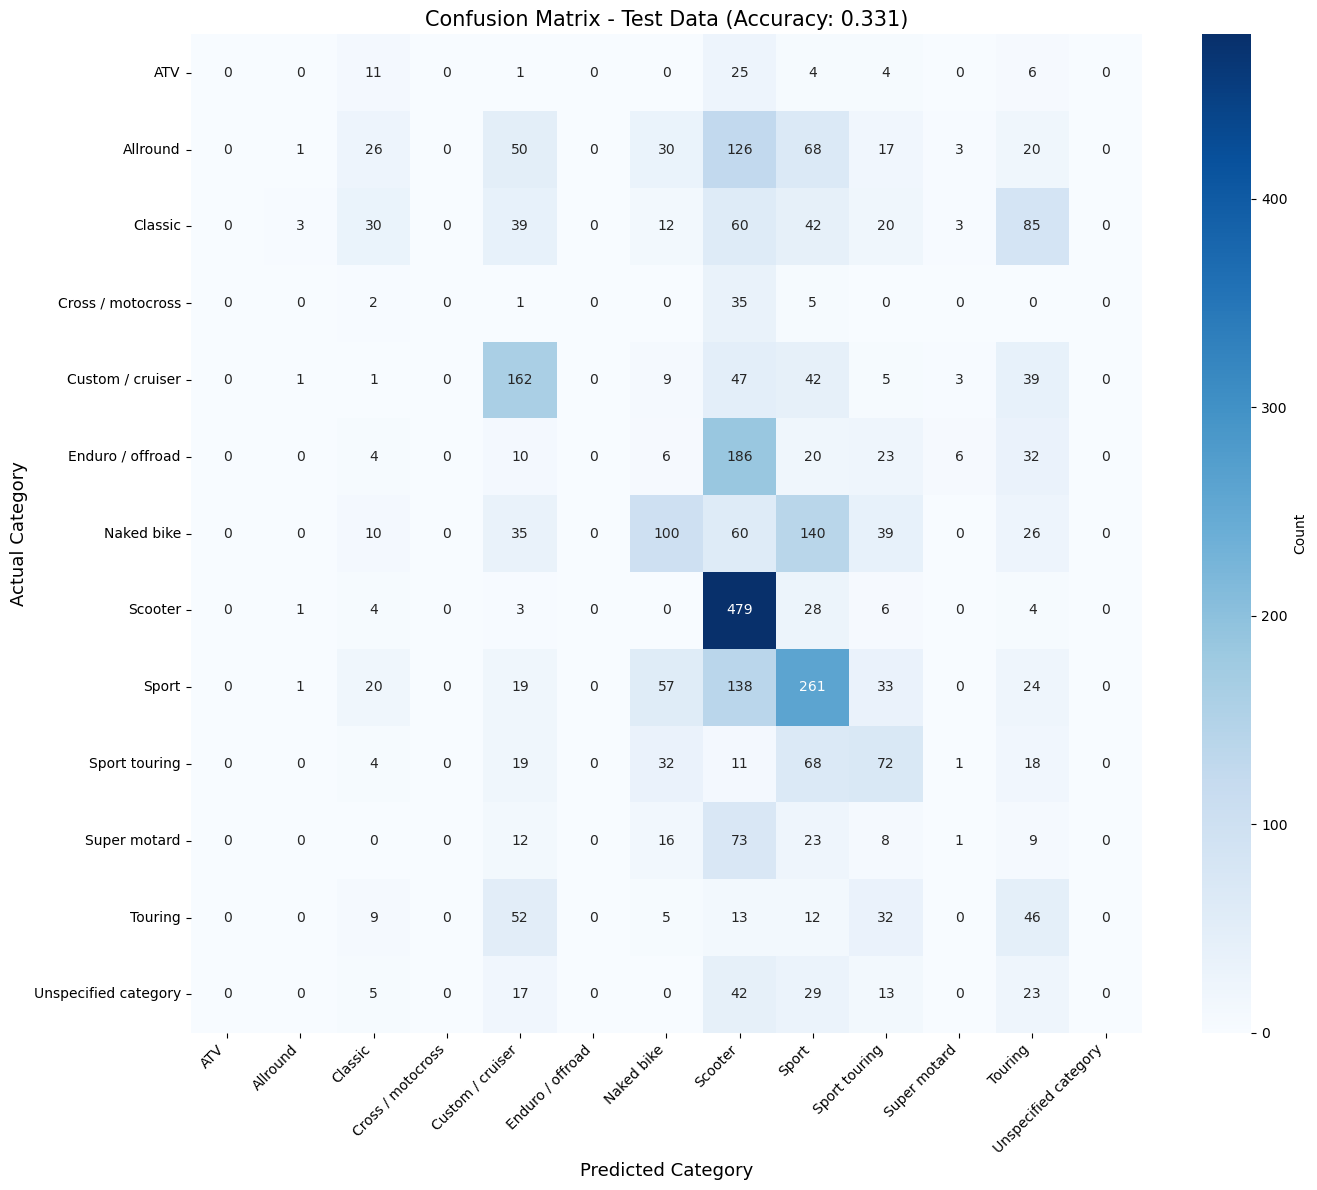


Train Accuracy: 0.332

MODELLE GESPEICHERT
Modell: c:\Users\david\E-15\Programmieren\MotorcycleClassification\code/models\mnl_model.pkl
LabelEncoder: c:\Users\david\E-15\Programmieren\MotorcycleClassification\code/models\mnl_label_encoder.pkl


In [26]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import datetime
import seaborn as sns
import os

# Ordner erstellen falls nicht vorhanden
doc_path = os.path.join(path, "documentation")
models_dir = os.path.join(path, "code/models")  # Umbenannt!
os.makedirs(doc_path, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)  # Models Ordner auch erstellen!

# 4. Vorhersagen auf Testdaten
print("\n" + "="*60)
print("EVALUATION ON TEST DATA")
print("="*60 + "\n")

# Wahrscheinlichkeiten vorhersagen
y_pred_proba = fit_model.predict(X_test[numeric_values])

# Klasse mit höchster Wahrscheinlichkeit auswählen
y_pred_test = y_pred_proba.idxmax(axis=1)

# 5. Classification Report mit Kategorienamen
print("Classification Report:")
report = classification_report(y_test, y_pred_test, target_names=le.classes_)
print(report)

# Classification Report speichern
report_path = os.path.join(doc_path, 'mnl_classification_report.txt')
with open(report_path, 'w') as f:
    f.write("CLASSIFICATION REPORT\n")
    f.write("="*60 + "\n\n")
    f.write("Klassen-Mapping:\n")
    for i, category in enumerate(le.classes_):
        f.write(f"{i}: {category}\n")
    f.write("\n")
    f.write(report)
    f.write(f"\n\nTest Accuracy: {accuracy_score(y_test, y_pred_test):.3f}\n")
print(f"Classification Report gespeichert als: {report_path}")

# 6. Accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nTest Accuracy: {accuracy:.3f}")

# 7. Model Summary speichern
summary_path = os.path.join(doc_path, 'mnl_model_summary.txt')
with open(summary_path, 'w') as f:
    f.write("MODEL SUMMARY - MULTINOMIAL LOGIT\n")
    f.write("="*60 + "\n\n")
    f.write(str(fit_model.summary()))
print(f"Model Summary gespeichert als: {summary_path}")

# 8. Confusion Matrix mit echten Kategorienamen
categories = le.classes_  # Die echten Kategorienamen vom LabelEncoder

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=categories,  # Echte Namen
            yticklabels=categories,  # Echte Namen
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Category', fontsize=13)
plt.ylabel('Actual Category', fontsize=13)
plt.title(f'Confusion Matrix - Test Data (Accuracy: {accuracy:.3f})', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# Confusion Matrix speichern
cm_path = os.path.join(doc_path, 'mnl_confusion_matrix.png')
plt.savefig(cm_path, dpi=300, bbox_inches='tight')
print(f"Confusion Matrix gespeichert als: {cm_path}")

plt.show()

# 9. Train Accuracy
y_pred_train_proba = fit_model.predict(X_train[numeric_values])
y_pred_train = y_pred_train_proba.idxmax(axis=1)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"\nTrain Accuracy: {train_accuracy:.3f}")

# 10. Modell und LabelEncoder speichern
import pickle

model_file_path = os.path.join(models_dir, 'mnl_model.pkl')  # Jetzt mit models_dir!
le_file_path = os.path.join(models_dir, 'mnl_label_encoder.pkl')

with open(model_file_path, 'wb') as f:
    pickle.dump(fit_model, f)
with open(le_file_path, 'wb') as f:
    pickle.dump(le, f)

print(f"\n{'='*60}")
print("MODELLE GESPEICHERT")
print(f"{'='*60}")
print(f"Modell: {model_file_path}")
print(f"LabelEncoder: {le_file_path}")